In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

emails = pd.read_csv('emails.csv',sep=',', skiprows= 0, nrows=5000)


In [2]:
emails

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...
7,allen-p/_sent_mail/1004.,Message-ID: <17189699.1075863688308.JavaMail.e...
8,allen-p/_sent_mail/101.,Message-ID: <20641191.1075855687472.JavaMail.e...
9,allen-p/_sent_mail/102.,Message-ID: <30795301.1075855687494.JavaMail.e...


In [3]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')  #This will split message in lines
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']     # pass a dictinory
    for line in lines:
        if ':' not in line:
            message += line.strip()     
            """
            message=message + line.strip()
            Line.strip()= This will remove the string present in function.
                          If nothig is present then it will remove spaces.
            """
            email['body'] = message
        else:
            pairs = line.split(':')
            """
            split() method returns a list of strings after breaking the given string by the specified separator
            
            """
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

def map_to_list(emails, key):
    results = []
    for email in emails:
        if key not in email:
            results.append('')
        else:
            results.append(email[key])
    return results

def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'body': map_to_list(emails, 'body'), 
        'to': map_to_list(emails, 'to'), 
        'from_': map_to_list(emails, 'from')
    }

In [4]:
email_df = pd.DataFrame(parse_into_emails(emails.message))

In [5]:
email_df

,body,to,from_
0,Here is our forecast,tim.belden@enron.com,phillip.allen@enron.com
1,Traveling to have a business meeting takes the...,john.lavorato@enron.com,phillip.allen@enron.com
2,test successful. way to go!!!,leah.arsdall@enron.com,phillip.allen@enron.com
3,"Randy,Can you send me a schedule of the salary...",randall.gay@enron.com,phillip.allen@enron.com
4,,greg.piper@enron.com,phillip.allen@enron.com
5,"Greg,How about either next Tuesday or Thursday...",greg.piper@enron.com,phillip.allen@enron.com
6,Phillip Allen (pallen@enron.com)Mike Grigsby (...,"david.l.johnson@enron.com, john.shafer@enron.com",phillip.allen@enron.com
7,,joyce.teixeira@enron.com,phillip.allen@enron.com
8,I don't think these are required by the ISP2. ...,mark.scott@enron.com,phillip.allen@enron.com
9,---------------------- Forwarded by Phillip K ...,"""'Pallen@Enron.com'"" <Pallen@Enron.com>",phillip.allen@enron.com


In [6]:
#To be 100% sure there are no empty columns
email_df.drop(email_df.query( "body == '' | to == '' | from_ == ''").index, inplace=True)

In [7]:
#Analyzing text with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(email_df.body)
X_array= X.toarray()

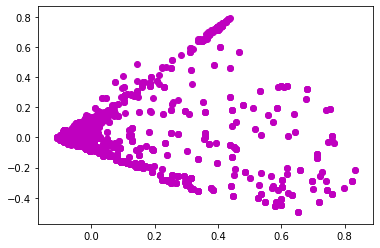

In [8]:
#quick plot to visualize this matrix
#2d representation of the DTM (document-term matrix)
from sklearn.decomposition import PCA

X_dense = X.todense()   #Return a dense matrix representation of this matrix
coords = PCA(n_components=2).fit_transform(X_dense)  #PCA convert (4818, 25020) into (4818, 2) 
plt.scatter(coords[:, 0], coords[:, 1], c='m')   #Plotting every row w.r.t column 0 and 1
plt.show()

##### This graph helps to find out what are the top keywords in those emails.

In [9]:
#for getting the top features from emails(body)
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]    #this will give top_n values 
    """
    np.argsort=sort the array
    
    L = range(10)
    L[::-1]=[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    
    """
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

#### Explaination of above function

In [10]:
"""
row = np.squeeze(X[1].toarray())  #By changing value to row(X[row_id]) we can get top features of each row accordingly 
topn_ids=np.argsort(row)[::-1][:20]  # getting top 20 features
Print(topn_ids)
top_feats = [(features[i], row[i]) for i in topn_ids]
print(top_feats)

"""

'\nrow = np.squeeze(X[1].toarray())  #By changing value to row(X[row_id]) we can get top features of each row accordingly \ntopn_ids=np.argsort(row)[::-1][:20]  # getting top 20 features\nPrint(topn_ids)\ntop_feats = [(features[i], row[i]) for i in topn_ids]\nprint(top_feats)\n\n'

In [11]:
# top keywords in emails(body)
features = vect.get_feature_names()
print(top_feats_in_doc(X, features, 1, 10))

     features     score
0    meetings  0.389375
1        trip  0.324520
2    business  0.292258
3         ski  0.288418
4       takes  0.207473
5         try  0.152319
6   stimulate  0.147159
7   presenter  0.144209
8      flying  0.139399
9  productive  0.139399


In [12]:
#for getting the top features from emails[to and from]
def top_mean_feats(X, features,grp_ids=None, min_tfidf=0.1, top_n=25):
    """
    max_df is used for removing terms that appear too frequently.
    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents.
    min_df is used for removing terms that appear too infrequently.
    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents.
    
    """
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [13]:
#Returning the top terms out of all the emails[to and from].
print(top_mean_feats(X, features, top_n=10))

  features     score
0    enron  0.038006
1      ect  0.037605
2      hou  0.024889
3      com  0.020817
4  phillip  0.014183
5  message  0.009569
6    image  0.009068
7    allen  0.009013
8    email  0.008982
9      gas  0.008948


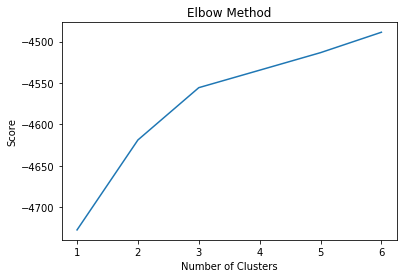

In [15]:
from sklearn.cluster import KMeans

number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

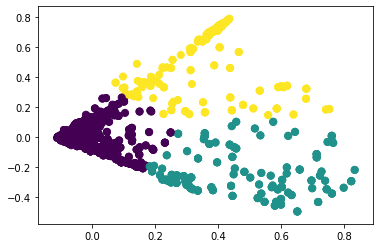

In [16]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_array)
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(Y_sklearn)
pred = clf.predict(Y_sklearn)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=pred, s=50, cmap='viridis')

In [17]:
#function that extracts the top terms per cluster.
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vect.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        df.label = label
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(X_array, pred, 15)

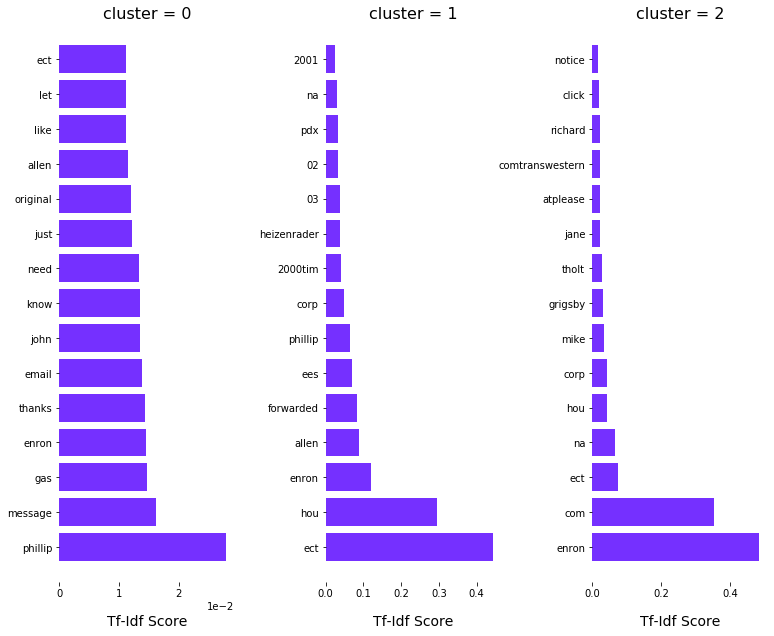

In [18]:
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()
plot_tfidf_classfeats_h(dfs)    

In [19]:
# To add some more words in stop words
"""
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
vec_train = vec.fit_transform(email_df.body)

"""

"\nfrom sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS\n\nstopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])\nvec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)\nvec_train = vec.fit_transform(email_df.body)\n\n"